# A Brief Data Exploration

We're interested in parsing this XML document for three fields: value, usage point, and time occured. Let's load the document as text and see what exactly the tag names are.

In [14]:
f = open('./data.xml', 'r')
for line in f:
    print line.strip('\n')

<?xml version="1.0"?>
<feed xmlns="http://www.w3.org/2005/Atom" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://naesb.org/espi espi.xsd">
  <id>urn:uuid:5762c9e8-4e65-3b0c-83b3-7874683f3dbe</id>
  <link href="/v1/espi_third_party_batch_feed" rel="self">
  </link>
  <title type="text">Opower ESPI Third Party Batch Feed v1</title>
  <updated>2012-04-06T20:00:42.476Z</updated>
  <entry>
    <id>urn:uuid:41c8ef8e-64d0-3542-8a5d-1652ab7f5ee0</id>
    <link href="/v1/User/6040272/UsagePoint/290243" rel="self">
    </link>
    <link href="/v1/User/6040272/UsagePoint/290243/MeterReading/1" rel="related">
    </link>
    <title type="text">A10S Large</title>
    <updated>2012-04-06T20:00:42.476Z</updated>
    <published>2011-11-30T12:00:00.000Z</published>
    <content type="xml">
      <UsagePoint xmlns="http://naesb.org/espi">
        <ServiceCategory>
          <kind>0</kind>
        </ServiceCategory>
      </UsagePoint>
    </content>
  </entry>
  <entry>
 

          <value>6000</value>
        </IntervalReading>
        <IntervalReading>
          <timePeriod>
            <duration>900</duration>
            <start>1299452400</start>
          </timePeriod>
          <value>6000</value>
        </IntervalReading>
        <IntervalReading>
          <timePeriod>
            <duration>900</duration>
            <start>1299453300</start>
          </timePeriod>
          <value>5700</value>
        </IntervalReading>
        <IntervalReading>
          <timePeriod>
            <duration>900</duration>
            <start>1299454200</start>
          </timePeriod>
          <value>5400</value>
        </IntervalReading>
        <IntervalReading>
          <timePeriod>
            <duration>900</duration>
            <start>1299455100</start>
          </timePeriod>
          <value>5700</value>
        </IntervalReading>
        <IntervalReading>
          <timePeriod>
            <duration>900</duration>
            <start>1299456000</start>

## Clarifying Data
It seems the XML document contains three **entry** elements which all related to the same entity. Meaning each one adds to the overall information we have about some meter somewhere. 

### Value
The **value** tag appears many times. Also, each instance has an int as its text. That's great and straightforward.

### Occured
We don't seem to have anything called "occured" time, we do have **updated** and **published** time, though. According to the assigning email, we want times in format like "2011-11-30T12:00:00.000Z" which is a time that appears in the first **published** element. We'll assume "occured" should be **published**.

### UsagePoint
We only see one instance of a **UsagePoint** tag. The phrase appears in links throughout the beginning of the document, but we'll ignore that. 

From the schema provided, we learn that a usage point is the "Logical point on a network at which consumption or production is either physically measured (e.g., metered) or estimated (e.g., unmetered street lights)." And that a service category is the "Category of service provided to the customer." 

We'll assume then that we aren't after the UsagePoint object, as there's no text. We'll grab the text int at **UsagePoint/ServiceCategory/kind** as the value of **UsagePoint**.


In [15]:
# Let's go ahead and load the document with a parser like ElementTree.
import xml.etree.ElementTree as ET
tree = ET.parse('./data.xml')

In [16]:
# Take a peak at what the tags look like
for element in tree.iter():
    print element.tag

{http://www.w3.org/2005/Atom}feed
{http://www.w3.org/2005/Atom}id
{http://www.w3.org/2005/Atom}link
{http://www.w3.org/2005/Atom}title
{http://www.w3.org/2005/Atom}updated
{http://www.w3.org/2005/Atom}entry
{http://www.w3.org/2005/Atom}id
{http://www.w3.org/2005/Atom}link
{http://www.w3.org/2005/Atom}link
{http://www.w3.org/2005/Atom}title
{http://www.w3.org/2005/Atom}updated
{http://www.w3.org/2005/Atom}published
{http://www.w3.org/2005/Atom}content
{http://naesb.org/espi}UsagePoint
{http://naesb.org/espi}ServiceCategory
{http://naesb.org/espi}kind
{http://www.w3.org/2005/Atom}entry
{http://www.w3.org/2005/Atom}id
{http://www.w3.org/2005/Atom}link
{http://www.w3.org/2005/Atom}link
{http://www.w3.org/2005/Atom}link
{http://www.w3.org/2005/Atom}updated
{http://www.w3.org/2005/Atom}published
{http://www.w3.org/2005/Atom}content
{http://naesb.org/espi}MeterReading
{http://www.w3.org/2005/Atom}entry
{http://www.w3.org/2005/Atom}id
{http://www.w3.org/2005/Atom}link
{http://www.w3.org/2005/A

I don't want to be typing these namespace path elements. We can make it a little cleaner to look at when doing searches.

In [17]:
# A lesser known feature of ElementTree it's ability to deal with namespaces
namespaces = {
    'Atom' : 'http://www.w3.org/2005/Atom',
    'NAESB': 'http://naesb.org/espi'
}

In [18]:
# We can search all descendants in the XML tree for a given tag with...
#      tree.findall(".//" + tag_name)

# Find all "value" objects in the NAESB namespace
for element in tree.findall('.//NAESB:value', namespaces):
    print element.tag + '\t' + element.text

{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	2700
{http://naesb.org/espi}value	2700
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	2700
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	2700
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	2700
{http://naesb.org/espi}value	3300
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	2700
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	2700
{http://naesb.org/espi}value	2400
{http://naesb.org/espi}value	2400
{http://naesb.org/espi}value	2100
{http://naesb.org/espi}value	4200
{http://naesb.org/espi}value	5100
{http://naesb.org/espi}value	5400
{http://naesb.org/espi}value	3000
{http://naesb.org/espi}value	1500
{http://naesb.

In [19]:
# Find all "published" objects in the Atom namespace
for element in tree.findall('.//Atom:published', namespaces):
    print element.tag + '\t' + element.text

{http://www.w3.org/2005/Atom}published	2011-11-30T12:00:00.000Z
{http://www.w3.org/2005/Atom}published	2011-11-30T12:00:00.000Z
{http://www.w3.org/2005/Atom}published	2011-11-30T12:00:00.000Z


In [20]:
# Find all kind objects in the NAESB namespace
for element in tree.findall('.//NAESB:kind', namespaces):
    print element.tag + '\t' + element.text

{http://naesb.org/espi}kind	0


## Endgame

Everything looks great. There's slight funiness introduced by having multiple entries (so we see things like multiple identical published dates). We could merge the entry elements and deal with collisions, but I've already gone into the weeds enough here. :)

Let's cut to the [cut to the chase](https://en.wikipedia.org/wiki/Cut_to_the_chase). We'll make rows of each value from the readings and repeat **kind** and **published** a whole bunch. And we'll use pandas because it's fun!

In [21]:
import pandas as pd

# Find all "value" objects in the NAESB namespace
values = [element.text for element in tree.findall('.//NAESB:value', namespaces)]

# Find the first "published" object in the Atom namespace
published = tree.find('.//Atom:published', namespaces).text

# Find the first "kind" object in the NAESB namespace
kind = tree.find('.//NAESB:kind', namespaces).text

# Create a pandas dataframe using column headers as given in the email.
df = pd.DataFrame.from_dict({
        "usage point": kind,
        "occured": published,
        "value": values
})
print df

                     occured usage point value
0   2011-11-30T12:00:00.000Z           0  3000
1   2011-11-30T12:00:00.000Z           0  3000
2   2011-11-30T12:00:00.000Z           0  2700
3   2011-11-30T12:00:00.000Z           0  2700
4   2011-11-30T12:00:00.000Z           0  3000
5   2011-11-30T12:00:00.000Z           0  3000
6   2011-11-30T12:00:00.000Z           0  2700
7   2011-11-30T12:00:00.000Z           0  3000
8   2011-11-30T12:00:00.000Z           0  3000
9   2011-11-30T12:00:00.000Z           0  3000
10  2011-11-30T12:00:00.000Z           0  2700
11  2011-11-30T12:00:00.000Z           0  3000
12  2011-11-30T12:00:00.000Z           0  2700
13  2011-11-30T12:00:00.000Z           0  3300
14  2011-11-30T12:00:00.000Z           0  3000
15  2011-11-30T12:00:00.000Z           0  2700
16  2011-11-30T12:00:00.000Z           0  3000
17  2011-11-30T12:00:00.000Z           0  3000
18  2011-11-30T12:00:00.000Z           0  3000
19  2011-11-30T12:00:00.000Z           0  3000
20  2011-11-3

Looks good to me! Let's export and check it out in Excel!

In [22]:
df.to_csv('data.csv', index=False)

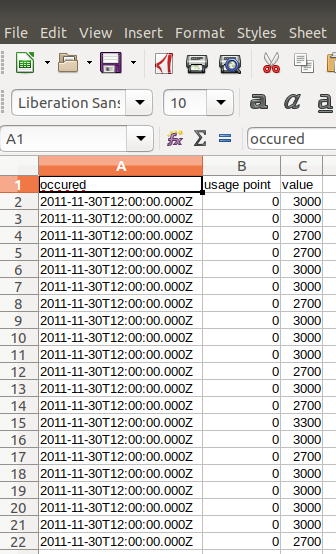